In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

In [79]:
all_data_df = pd.read_csv("Data/combined_zpallagi.csv")

In [80]:
#function to multiply monetary columns by 1000
def by_thousand(df):
    
    columns_to_multiply = ['AGI_Amt', 'Standar_Ded_Amt', 'Itemized_Ded_Amt', 'Total_Taxes_Amt', 'Charitable_Amt']
    
    try:
        # Multiply monetary columns by 1000 (if columns exist in the DataFrame)
        df[columns_to_multiply] = df[columns_to_multiply] * 1000
    except KeyError as e:
        missing_columns = [col for col in columns_to_multiply if col not in df.columns]
        print(f"Skipping non-existent columns: {missing_columns}")

    return df

In [81]:
all_data_adj = by_thousand(all_data_df)

Skipping non-existent columns: ['Standar_Ded_Amt', 'Total_Taxes_Amt']


In [82]:
#get rid of columns
columns_to_keep = ['id', 'year', 'State', 'new_agi_stub', 'Returns', 'Single', 'Joint',
       'Hd_of_Hshld', 'AGI_Amt','Itemized_Ded_Amt',
       'Charitable_Returns', 'Charitable_Amt']
plotable_df = all_data_adj[columns_to_keep]


In [86]:
grouped_df = plotable_df.groupby('year')['Charitable_Amt'].sum().reset_index()

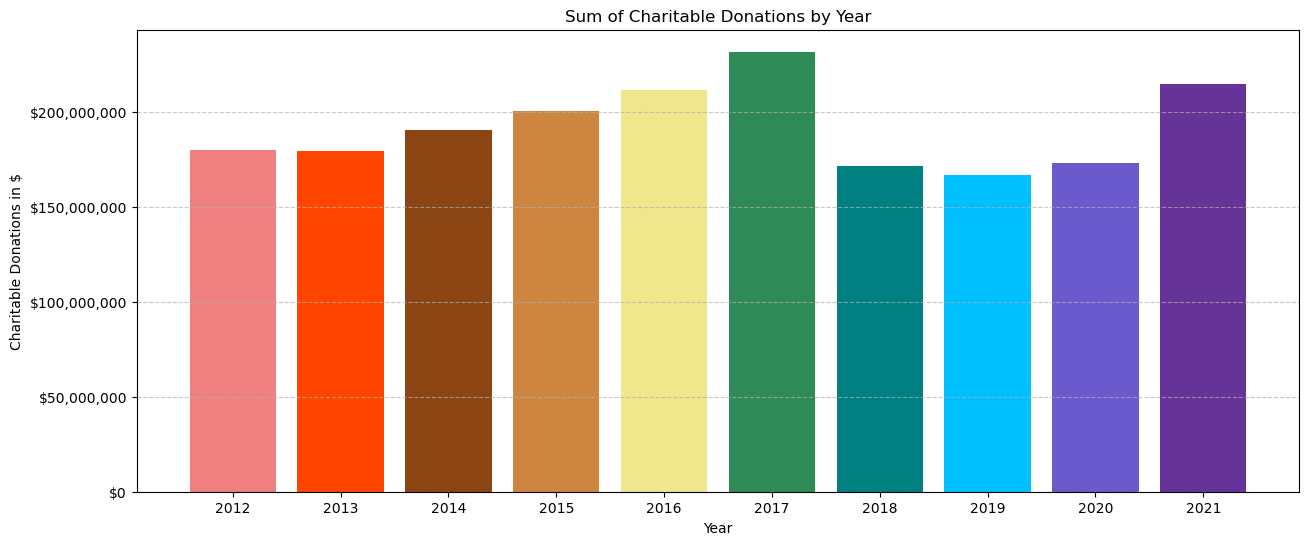

<Figure size 1600x600 with 0 Axes>

In [87]:
colors = ['lightcoral','orangered','saddlebrown','peru','khaki','seagreen','teal','deepskyblue','slateblue','rebeccapurple']
labels = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
plt.figure(figsize=(15, 6))
plt.bar(grouped_df['year'].astype(str), grouped_df['Charitable_Amt'], color= colors)
plt.xlabel('Year')
plt.ylabel('Charitable Donations in $')
plt.title('Sum of Charitable Donations by Year')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=.7)
plt.figure(figsize=(16, 6))
plt.show()